In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:90%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:10pt;padding:5px;}
table.dataframe{font-size:10px;}
</style>
"""))

<b><font size="6" color="red">Test</font><b>

# 문제 1  - df_first의 heatmap

In [2]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

%config InlineBackend.figure_format = "retina"

sns.set(style='white', rc={'figure.figsize':(12,3)})
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
warnings.filterwarnings(action='ignore')

In [3]:
#데이터 프레임 변수 저장
df_first = pd.read_csv('C:/ai/downloads/부동산/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [4]:
#결측치 확인
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [5]:
df_first.isna().sum() #열별 결측치 없음 확인

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [6]:
#'지역'을 index로 세팅해 할당
df_first_heat = df_first.set_index('지역')
df_first_heat.sample(5)

,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
지역,,,,,,,,,,,,,,,,,,,,,
제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,7833,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343
대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
충남,6365,6365,6379,6287,6552,6591,6644,6805,6914,6882,...,6940,6989,6976,6980,7161,7017,6975,6939,6935,6942
부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449


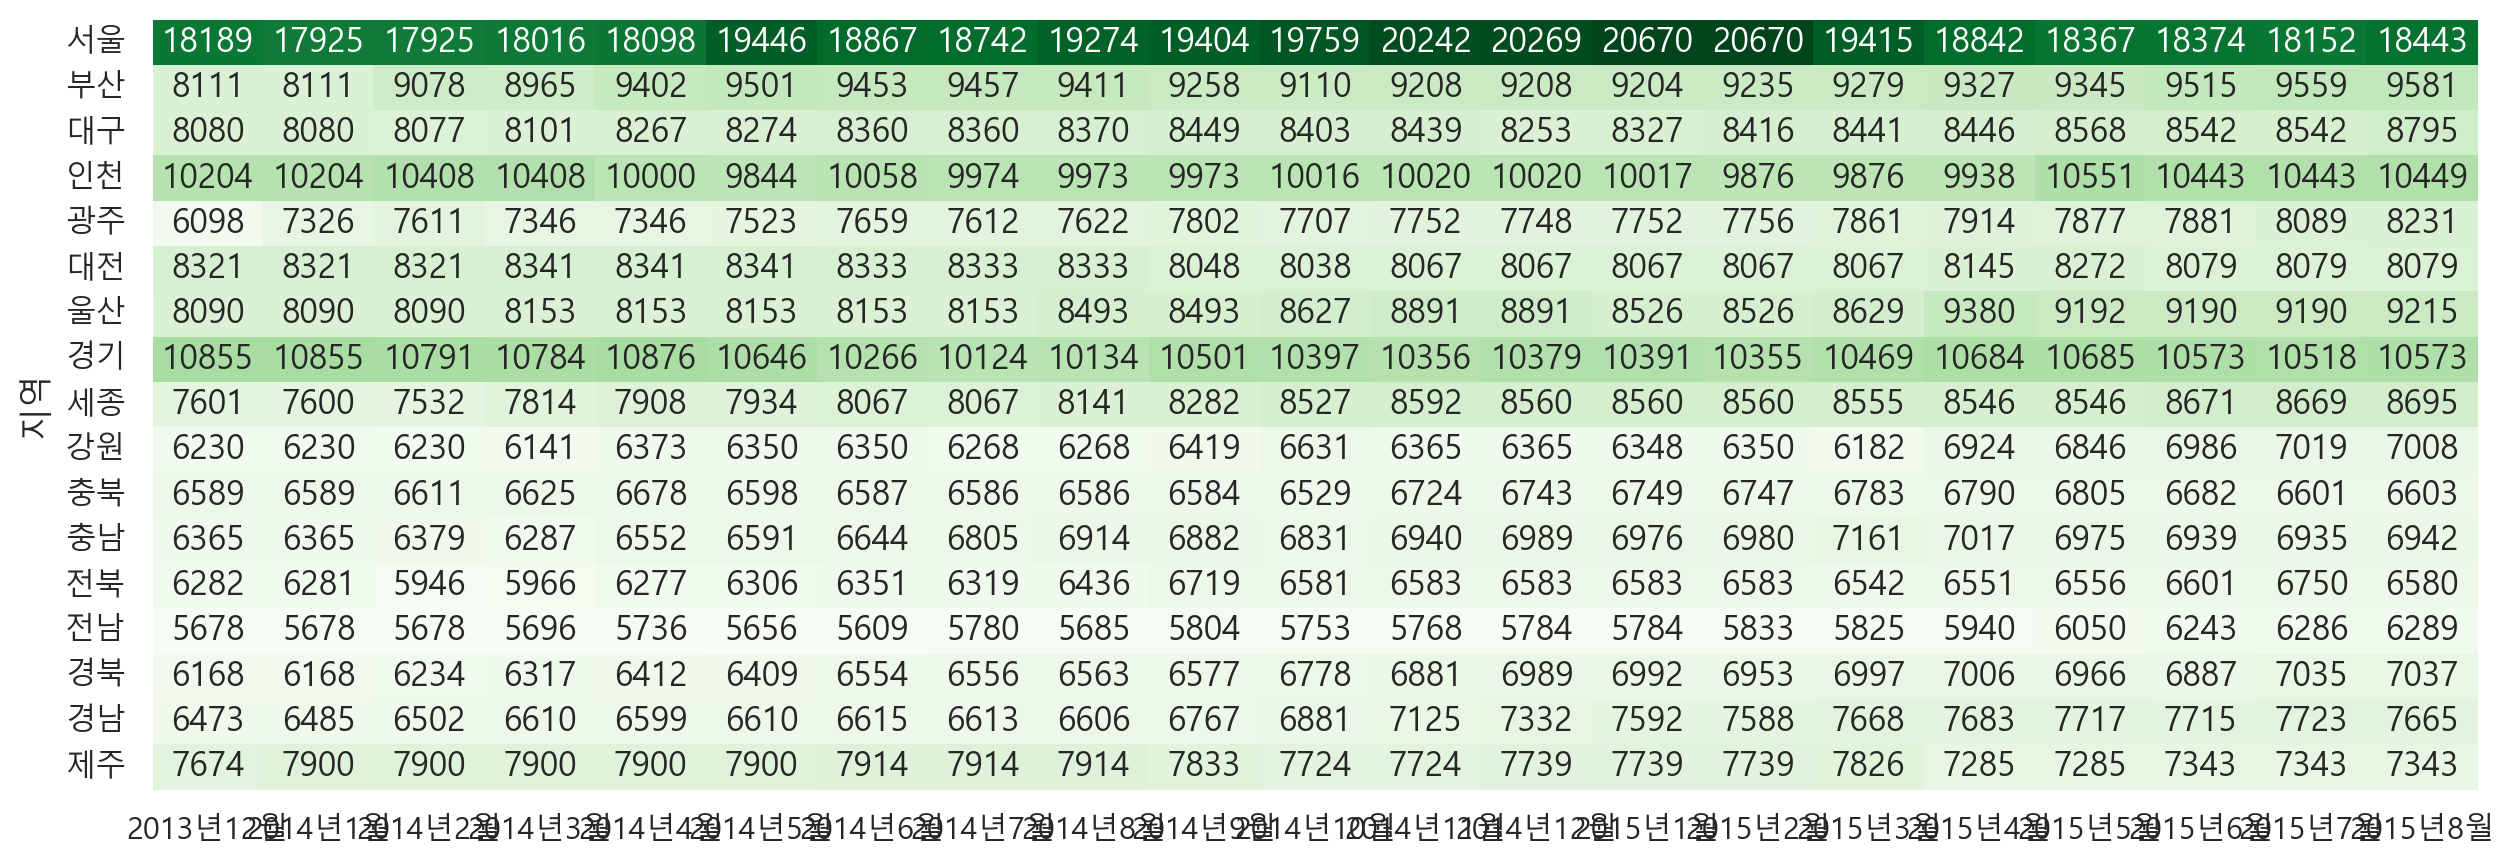

In [7]:
#heatmap 그리기
plt.figure(figsize=(15,5))
sns.heatmap(df_first_heat, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xticks(rotation=0)
plt.show()

# 문제 2 - df_last 평당분양가격 출력

In [8]:
# 데이터 로드
df_last = pd.read_csv('c:/ai/downloads/부동산/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',
                     encoding='cp949')
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9095 non-null   object
 1   규모구분        9095 non-null   object
 2   연도          9095 non-null   int64 
 3   월           9095 non-null   int64 
 4   분양가격(제곱미터)  8481 non-null   object
dtypes: int64(2), object(3)
memory usage: 355.4+ KB


In [9]:
# 열별 결측치 확인
df_last.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    614
dtype: int64

In [10]:
# 함수 정의
def commadrop(row):
    row = row.copy()
    price = row['분양가격(제곱미터)']
    if price is np.nan:
        pass
    elif price.strip() == '':
        row['분양가격(제곱미터)'] = np.nan
    elif price.find(',') != -1:
        pricesplited = price.split(',')
        row['분양가격(제곱미터)'] = float(''.join(pricesplited))
    else:
        row['분양가격(제곱미터)'] = float(price)
    return row
df_last.apply(commadrop, axis=1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879.0
...,...,...,...,...,...
9090,제주,모든면적,2024,8,7703.0
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515.0
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN


In [11]:
#apply함수 모든 행 적용 
df_last.apply(commadrop, axis=1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879.0
...,...,...,...,...,...
9090,제주,모든면적,2024,8,7703.0
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515.0
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN


In [13]:
#숫자형 적용
df_last['분양가격(제곱미터)'] = pd.to_numeric(df_last['분양가격(제곱미터)'].str.strip().str.replace(',',''))
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879.0


In [14]:
#평당분양가격 컬럼 생성
df_last['평당분양가격'] = df_last['분양가격(제곱미터)']*3.3
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8355 non-null   float64
 5   평당분양가격      8355 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 426.5+ KB


In [15]:
#전용면적 표기법 변경 및 열 제거
import re
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : re.sub('전용면적|이하| ', '', x).replace('제곱미터', 'm²').replace('초과','~')) 
df_last.drop(['규모구분', '분양가격(제곱미터)'], axis=1, inplace=True)
df_last.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60m²
2,서울,2015,10,19410.6,60m²~85m²
3,서울,2015,10,18879.3,85m²~102m²
4,서울,2015,10,19400.7,102m²~


In [19]:
#컬럼 순서 조정
col = df_last.pop('전용면적')
df_last.insert(1, '전용면적', col)
df_last

,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,60m²,2015,10,18651.6
2,서울,60m²~85m²,2015,10,19410.6
3,서울,85m²~102m²,2015,10,18879.3
4,서울,102m²~,2015,10,19400.7
...,...,...,...,...,...
9090,제주,모든면적,2024,8,25419.9
9091,제주,60m²,2024,8,NaN
9092,제주,60m²~85m²,2024,8,24799.5
9093,제주,85m²~102m²,2024,8,NaN


# 문제 3 - df_last 연도별, 지역명별 평당분양가격

In [23]:
#df_last.groupby(['연도', '지역명'])['평당분양가격'].mean().unstack().round(1)
df_last.pivot_table(index='연도', columns='지역명', values='평당분양가격').round(1)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.1,11060.9,8459.2,7464.2,7916.7,9018.9,8190.6,10377.4,20315.7,8765.0,9367.6,10976.0,6798.9,7110.4,7951.1,7689.9,6828.8
2016,7162.9,11685.0,8496.7,7753.4,9190.7,10282.0,8910.7,10743.5,21753.4,8857.8,9582.6,11099.1,6936.6,6906.6,9567.5,7958.2,7133.3
2017,7318.8,12296.2,8806.6,8288.1,9599.7,12192.0,9912.9,11637.6,21864.1,9132.9,10630.2,11672.4,7413.2,7406.1,12628.5,8157.3,7462.6
2018,8219.3,14258.4,9327.7,8680.8,9527.0,12139.3,10234.1,12890.0,23202.2,10340.5,10241.4,11881.5,7929.8,8174.6,11936.0,8201.8,8149.3
2019,8934.5,15665.5,10697.6,9050.2,12111.7,14081.6,12619.2,13537.9,28286.8,11299.4,10216.2,13249.8,8219.3,8532.3,11828.5,8748.8,7970.9
2020,10302.4,15106.1,10919.3,9997.7,13406.5,15314.2,11238.8,13353.0,29781.0,11628.1,12837.6,14983.0,9562.4,8559.4,14192.9,9139.4,8359.0
2021,10291.3,14567.1,11302.3,11227.2,13709.8,15586.3,11994.2,14317.7,29380.4,12578.1,14192.0,15774.3,9980.8,9047.9,22302.3,9860.7,8822.4
2022,11644.2,16621.6,12455.7,12018.0,15095.9,16821.9,14113.9,18166.8,29128.5,11310.0,17903.8,17341.8,10635.5,10003.1,18953.8,11730.3,10033.5
2023,13409.4,20175.2,13283.2,13025.3,17957.9,17656.7,17917.3,20470.9,33230.6,12278.2,18832.1,16150.7,11846.7,10966.0,24095.9,12580.6,11104.0


# 문제 4 - 연도별 평당분양가격 boxplot + violinplot

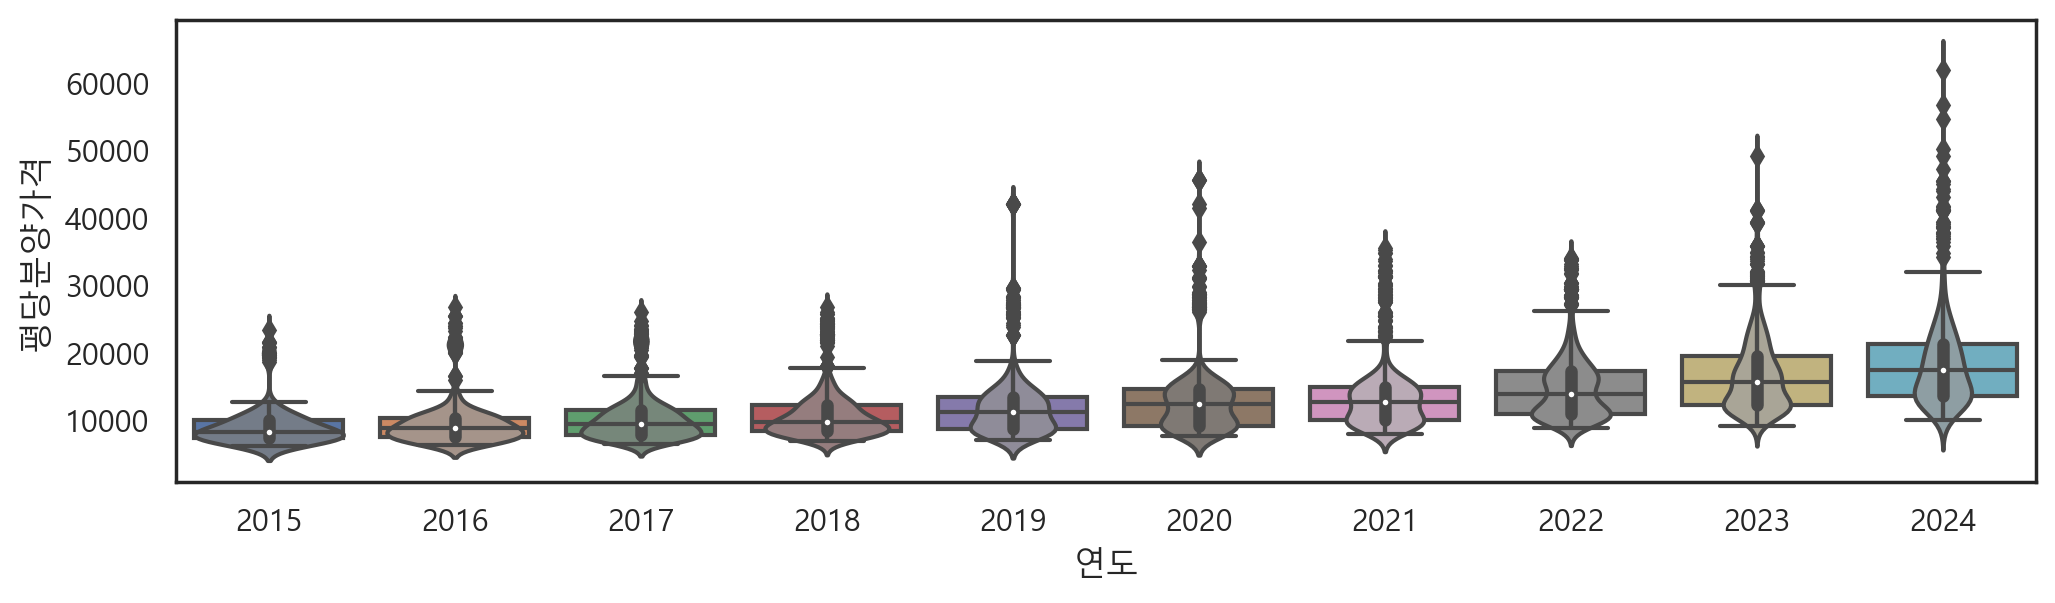

In [44]:
sns.violinplot(data=df_last, x='연도', y='평당분양가격', saturation=0.2)
sns.boxplot(data=df_last, x='연도', y='평당분양가격')
plt.show()

# 문제 5 - df_first와 df_last melt/pivot_table로 합쳐 df에 할당

In [27]:
# df_last 모든면적 행만 추리기
new_last = df_last[df_last['전용면적']=='모든면적']
new_last.drop('전용면적', axis=1, inplace=True)
new_last.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6


In [39]:
# df_first 연월 표기 및 컬럼 구조 변경
new_first = df_first.melt(id_vars='지역', 
                          var_name='연도월', 
                          value_name='평당분양가격')
new_first.head()

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [41]:
#연도/월 나누기
new_first['연도'] = new_first['연도월'].map(lambda datestr : int(datestr.split('년')[0]))
new_first['월'] = new_first['연도월'].map(lambda datestr : int(datestr.split('년')[-1][:-1]))
#연도월 버리기
new_first.drop('연도월', axis=1, inplace=True)
#'지역명'
new_first = new_first.rename(columns={'지역':'지역명'})
new_first.head()

,지역명,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12


In [42]:
df = pd.concat([new_first, new_last]).reset_index(drop=True)
df

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
2171,전북,12058.2,2024,8
2172,전남,13120.8,2024,8
2173,경북,13827.0,2024,8
2174,경남,13252.8,2024,8
